In [1]:
#전이 학습
!git clone https://github.com/taehojo/data-ch20.git

Cloning into 'data-ch20'...
remote: Enumerating objects: 265, done.
remote: Counting objects: 100% (265/265), done.
remote: Compressing objects: 100% (265/265), done.
remote: Total 265 (delta 0), reused 265 (delta 0), pack-reused 0
Receiving objects: 100% (265/265), 1.86 MiB | 41.44 MiB/s, done.


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import optimizers, models, layers, metrics, Input

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [3]:
#훈련용 데이터셋
path_train = '/content/data-ch20/train'

#학습 데이터 셋을 이미지 증강 설정
train_dategen = ImageDataGenerator(rescale = 1./255, #주어진 이미지 크기 설정 (0-1 설정>>정규화)
                horizontal_flip = True, #수평대칭 이미지 50%확률로 만듬 vertical_flip = True >> 수직 대칭
                width_shift_range = 0.1, #전체 크기의 10%범위 내 좌우 이동
                height_shift_range = 0.1, #전체 크기의 10%범위 내 상하 이동
                rotation_range = 5, #정해진 각도(5도)만큼 회전
                # shear_range = 0.7, #좌표 하나 고정, 나머지 이동
                zoom_range = 1.2, #확대/축소
                fill_mode = 'nearest' #빈공간 채움 'nearest' 주변 가장 비슷한 색
                )

train_generator = train_dategen.flow_from_directory(
    path_train,
    target_size = (150,150),
    batch_size = 5,
    class_mode = 'binary')


Found 160 images belonging to 2 classes.


In [4]:
path_test = '/content/data-ch20/test'

#학습 데이터 셋을 이미지 증강 설정
test_dategen = ImageDataGenerator(rescale = 1./255)
#반드시 정규화는 해준다.

test_generator = test_dategen.flow_from_directory(
    path_test,
    target_size = (150,150),
    batch_size = 5,
    class_mode = 'binary')


Found 120 images belonging to 2 classes.


In [5]:
#모델링 (CNN)

model = Sequential()
model.add(Conv2D(32,(3,3), input_shape=(150,150,3))) # 1(흑백) 3(컬러)
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3))) # 1(흑백) 3(컬러)
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten()) # 차원 축소
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 activation (Activation)     (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 72, 72, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                   

In [6]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(learning_rate=0.0002),
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10)

#모델 실행
history = model.fit(train_generator,
          epochs=100,
          validation_data = test_generator,
          validation_steps = 10,
          callbacks=[early_stopping])

Epoch 1/100
32/32 [==============================] - 7s 37ms/step - loss: 0.7170 - accuracy: 0.4500 - val_loss: 0.6916 - val_accuracy: 0.4800
Epoch 2/100
32/32 [==============================] - 1s 31ms/step - loss: 0.6953 - accuracy: 0.4938 - val_loss: 0.6947 - val_accuracy: 0.4800
Epoch 3/100
32/32 [==============================] - 1s 32ms/step - loss: 0.6909 - accuracy: 0.5625 - val_loss: 0.6915 - val_accuracy: 0.4400
Epoch 4/100
32/32 [==============================] - 1s 32ms/step - loss: 0.6914 - accuracy: 0.5188 - val_loss: 0.6893 - val_accuracy: 0.4600
Epoch 5/100
32/32 [==============================] - 1s 33ms/step - loss: 0.6955 - accuracy: 0.5437 - val_loss: 0.6876 - val_accuracy: 0.5600
Epoch 6/100
32/32 [==============================] - 1s 33ms/step - loss: 0.6900 - accuracy: 0.5437 - val_loss: 0.6854 - val_accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 1s 31ms/step - loss: 0.6886 - accuracy: 0.5312 - val_loss: 0.6776 - val_accuracy: 0.6600
Epoch 

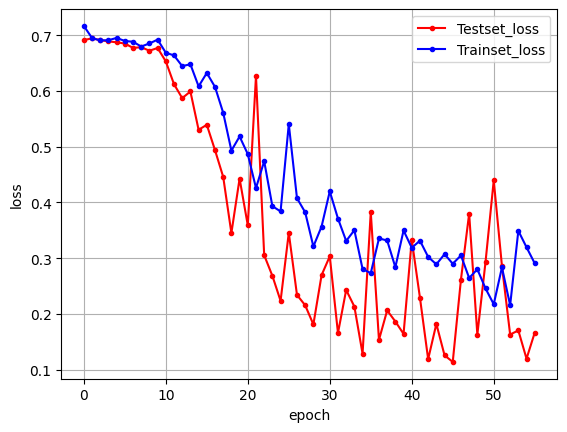

In [7]:
# 데이터 시각화
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
# 그래프 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

전이학습(Transfer Leraning)

In [16]:
from tensorflow.keras.applications import VGG16

transfer_model = VGG16(weights='imagenet', include_top=False, input_shape=(150,150,3))
# include_top = False : 가져온 모델의 마지막 분류기는 사용하지 않음
transfer_model.trainable=False
transfer_model.summary()


Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [17]:
finetune_model = models.Sequential()
finetune_model.add(transfer_model)
finetune_model.add(Flatten())
finetune_model.add(Dense(64, activation='relu'))
finetune_model.add(Dropout(0.5))
finetune_model.add(Dense(1, activation='sigmoid'))

finetune_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_4 (Dense)             (None, 64)                524352    
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 15239105 (58.13 MB)
Trainable params: 524417 (2.00 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [18]:
finetune_model.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(learning_rate=0.0002),
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10)

#모델 실행
history = finetune_model.fit(train_generator,
          epochs=20,
          validation_data = test_generator,
          validation_steps = 10,
          callbacks=[early_stopping])

Epoch 1/20
32/32 [==============================] - 2s 38ms/step - loss: 0.8276 - accuracy: 0.4375 - val_loss: 0.6978 - val_accuracy: 0.5200
Epoch 2/20
32/32 [==============================] - 1s 33ms/step - loss: 0.6670 - accuracy: 0.6062 - val_loss: 0.6137 - val_accuracy: 0.8200
Epoch 3/20
32/32 [==============================] - 1s 32ms/step - loss: 0.7292 - accuracy: 0.5125 - val_loss: 0.6301 - val_accuracy: 0.7800
Epoch 4/20
32/32 [==============================] - 1s 33ms/step - loss: 0.6633 - accuracy: 0.5938 - val_loss: 0.6320 - val_accuracy: 0.5400
Epoch 5/20
32/32 [==============================] - 1s 32ms/step - loss: 0.7242 - accuracy: 0.4812 - val_loss: 0.5657 - val_accuracy: 0.8400
Epoch 6/20
32/32 [==============================] - 1s 32ms/step - loss: 0.6308 - accuracy: 0.6250 - val_loss: 0.5474 - val_accuracy: 0.8200
Epoch 7/20
32/32 [==============================] - 1s 32ms/step - loss: 0.6278 - accuracy: 0.6687 - val_loss: 0.5211 - val_accuracy: 0.8200
Epoch 8/20
32

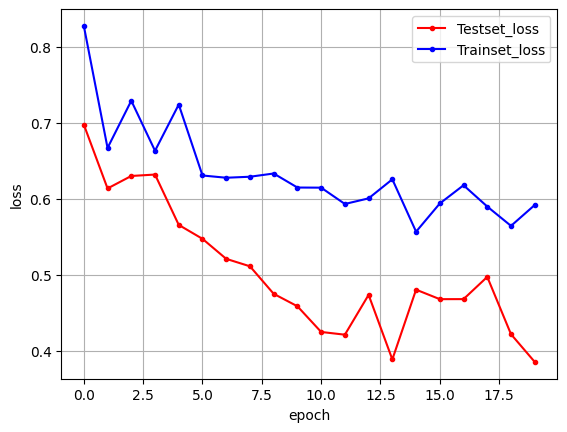

In [19]:
# 검증셋과 학습셋의 오차 저장
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()